In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


In [2]:
df = pd.read_csv('fer2013_balanced_5000.csv')

# Convert pixel column to numpy arrays
def process_pixels(pixel_str):
    return np.array(pixel_str.split(), dtype='float32').reshape(48, 48, 1) / 255.0

images = np.array([process_pixels(p) for p in df['pixels']])
labels = to_categorical(df['emotion'].values, num_classes=7)


In [3]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)


In [4]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\Snehashis\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,472,711 (9.43 MB)

 Trainable params: 2,471,815 (9.43 MB)

 Non-trainable params: 896 (3.50 KB)

In [5]:
history = model.fit(X_train, y_train, epochs=25, batch_size=64,
                    validation_data=(X_val, y_val))


Epoch 1/25
438/438 ━━━━━━━━━━━━━━━━━━━━ 139s 309ms/step - accuracy: 0.2213 - loss: 2.5796 - val_accuracy: 0.1854 - val_loss: 2.3621
Epoch 2/25
438/438 ━━━━━━━━━━━━━━━━━━━━ 153s 349ms/step - accuracy: 0.3586 - loss: 1.6509 - val_accuracy: 0.4260 - val_loss: 1.5071
Epoch 3/25
438/438 ━━━━━━━━━━━━━━━━━━━━ 160s 365ms/step - accuracy: 0.4225 - loss: 1.4885 - val_accuracy: 0.4764 - val_loss: 1.3638
Epoch 4/25
438/438 ━━━━━━━━━━━━━━━━━━━━ 157s 358ms/step - accuracy: 0.4681 - loss: 1.3769 - val_accuracy: 0.5186 - val_loss: 1.2431
Epoch 5/25
438/438 ━━━━━━━━━━━━━━━━━━━━ 130s 296ms/step - accuracy: 0.5030 - loss: 1.2900 - val_accuracy: 0.4140 - val_loss: 1.6178
Epoch 6/25
438/438 ━━━━━━━━━━━━━━━━━━━━ 128s 293ms/step - accuracy: 0.5414 - loss: 1.1926 - val_accuracy: 0.5191 - val_loss: 1.2758
Epoch 7/25
438/438 ━━━━━━━━━━━━━━━━━━━━ 125s 285ms/step - accuracy: 0.5573 - loss: 1.1466 - val_accuracy: 0.5981 - val_loss: 1.0504
Epoch 8/25
438/438 ━━━━━━━━━━━━━━━━━━━━ 126s 287ms/step - accuracy: 0.5786 -

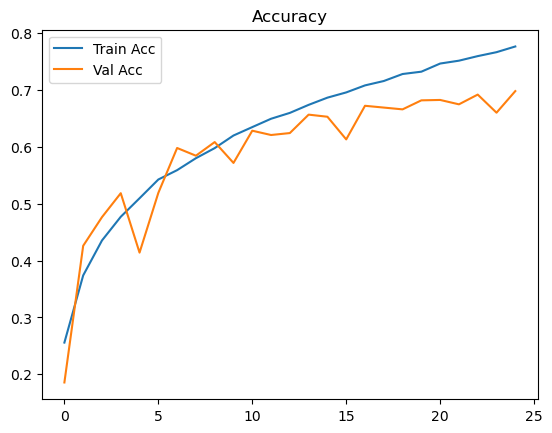

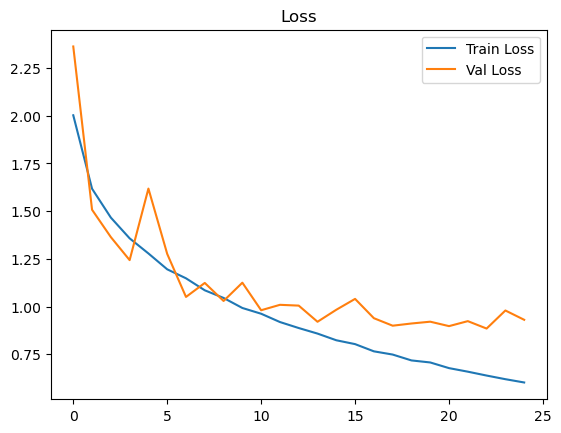

In [6]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.show()


219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step


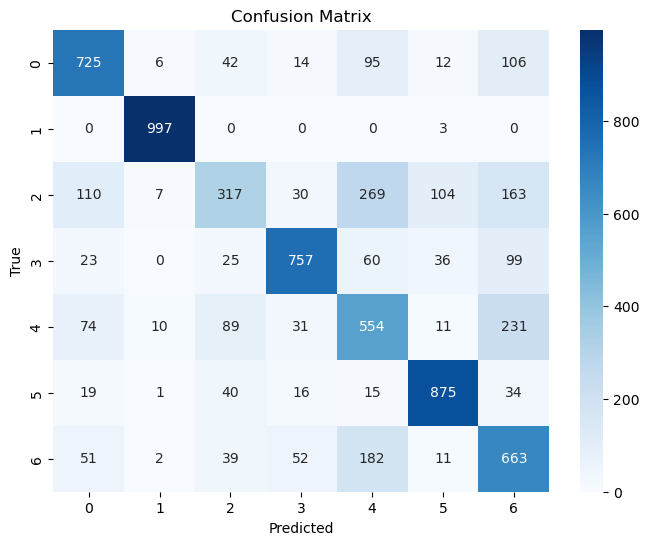

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.97      1.00      0.99      1000
           2       0.57      0.32      0.41      1000
           3       0.84      0.76      0.80      1000
           4       0.47      0.55      0.51      1000
           5       0.83      0.88      0.85      1000
           6       0.51      0.66      0.58      1000

    accuracy                           0.70      7000
   macro avg       0.70      0.70      0.69      7000
weighted avg       0.70      0.70      0.69      7000



In [7]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes))


In [10]:
model.save('emotion_recognition_model.keras')

